# Question 1-2

## Importing libraries

In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd
import math as mt
import sys
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

eps = np.finfo(float).eps

### Random initial position for K clusters centers

In [2]:
def initialize(X, K, c):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    centroids = np.random.randn(K,c)*std + mean
    return centroids

### K-Means Alogo

In [3]:
def K_means(K, X):
    n = X.shape[0]
    c = X.shape[1]
    centroids = initialize(X, K, c)
    centers_new = deepcopy(centroids) # Store new centers

    clusters = np.zeros(n)
    distances = np.zeros((n,K))
    error = 1
    itr = 0
    # When, after an update, the estimate of that center stays the same, exit loop
    while error != 0:
        itr += 1
        print("Iteration: ", itr)
        # Measure the distance to every center
        for i in range(K):
            distances[:,i] = np.linalg.norm(X - centers_new[i], axis=1)
        # Assign all training data to closest center
        clusters = np.argmin(distances, axis = 1)
        centers_old = deepcopy(centers_new)
        # Calculate mean for every cluster and update the center
        for i in range(K):
            centers_new[i] = np.mean(X[clusters == i], axis=0)
        error = np.linalg.norm(centers_new - centers_old)
    return centers_new, clusters

### Piechart plotter

In [4]:
def pieplotter(labels, sizes):
    plt.figure(num=None, figsize=(6, 4), dpi=150, facecolor='c', edgecolor='k')
    
    colors = ['lightcoral','gold', 'yellowgreen','lightskyblue', 'red','blue']
    patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
    plt.legend( loc = 'best', labels=['%s, %1.1f %%' % (l, 100*s/sum(sizes)) for l, s in zip(labels, sizes)])
    
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

### Reading the data set

In [5]:
dataSet = pd.read_csv("./../output_data/q-1-1_a_linear.csv")
Class = "xAttack"
columns = list(dataSet.columns)
X = dataSet[columns[:-1]].values
# X
Y = dataSet[Class]

### setting parameters

In [6]:
K = 5

In [7]:
centers_new, clusters = K_means(K,X)

Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
Iteration:  22
Iteration:  23
Iteration:  24
Iteration:  25
Iteration:  26
Iteration:  27
Iteration:  28
Iteration:  29
Iteration:  30
Iteration:  31
Iteration:  32
Iteration:  33
Iteration:  34
Iteration:  35
Iteration:  36
Iteration:  37
Iteration:  38
Iteration:  39
Iteration:  40
Iteration:  41
Iteration:  42
Iteration:  43
Iteration:  44
Iteration:  45
Iteration:  46
Iteration:  47
Iteration:  48
Iteration:  49
Iteration:  50
Iteration:  51
Iteration:  52
Iteration:  53
Iteration:  54
Iteration:  55
Iteration:  56
Iteration:  57


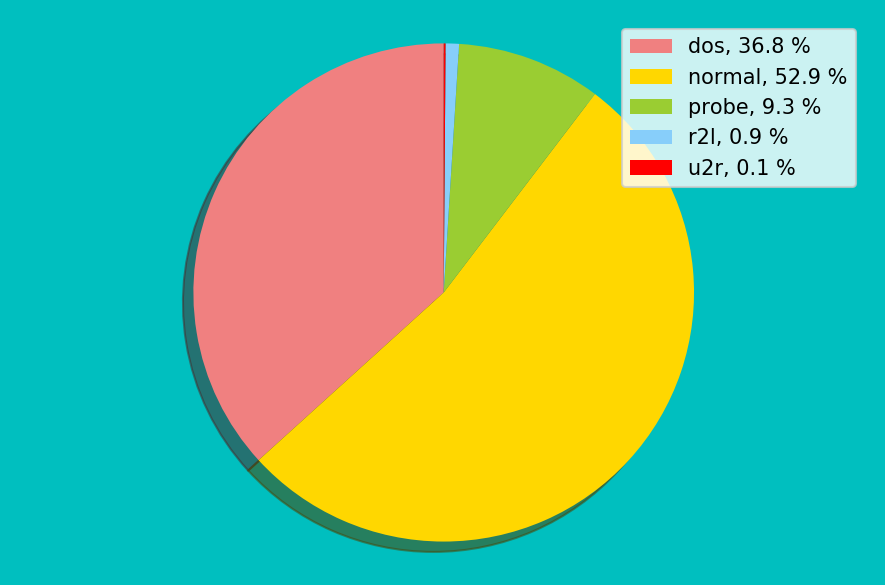

0 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [1837 2645  467   43    6]


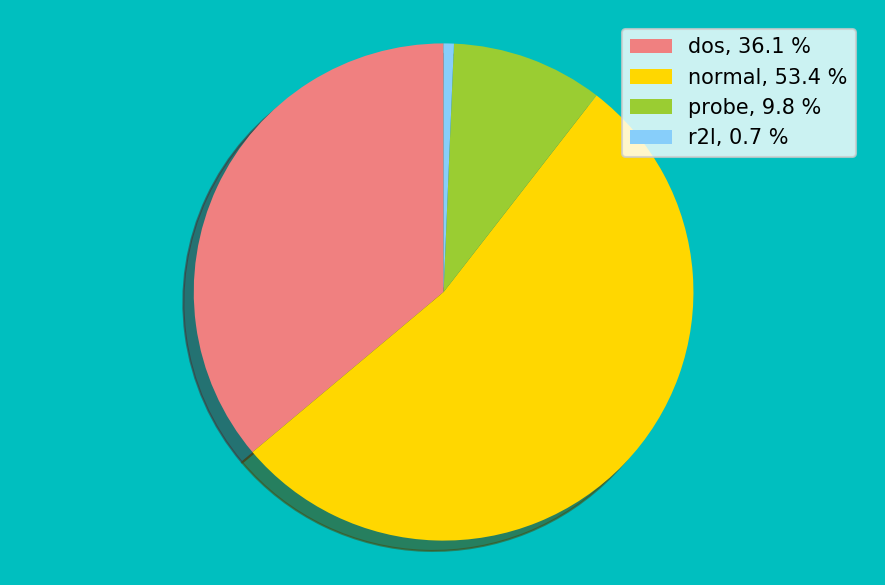

1 ['dos' 'normal' 'probe' 'r2l'] [1807 2669  491   33]


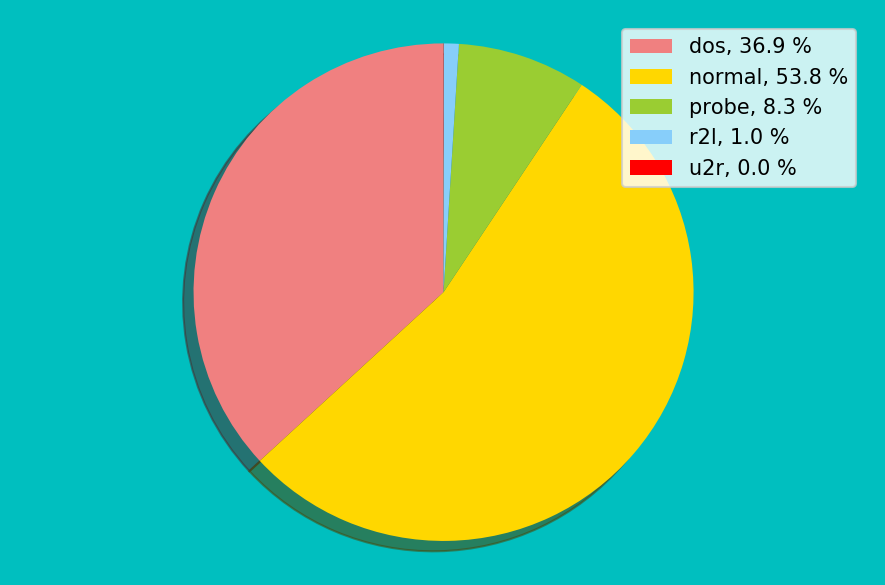

2 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [1844 2693  417   48    1]


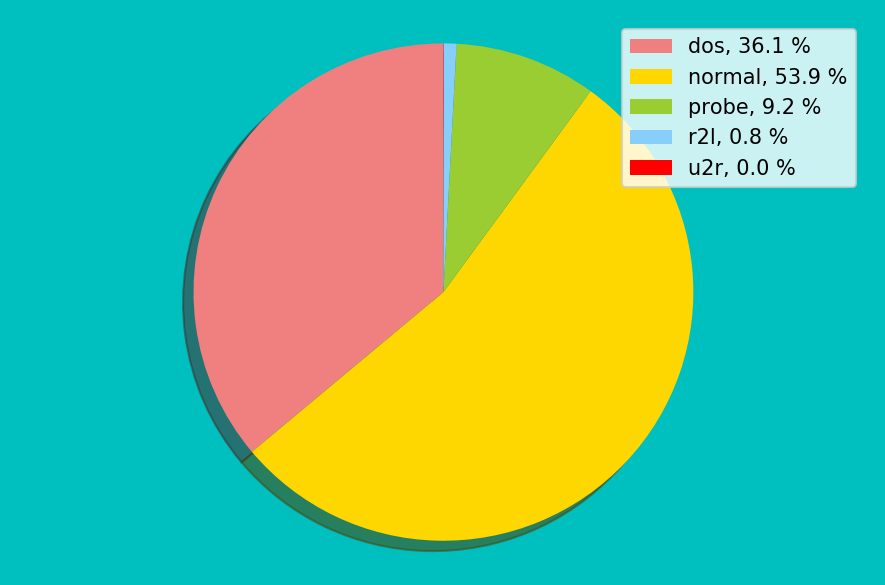

3 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [1804 2691  459   41    1]


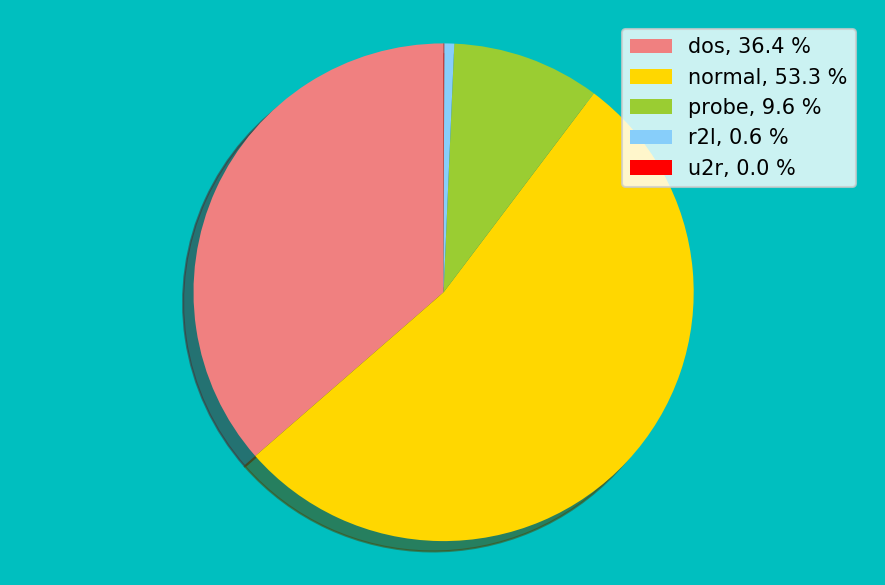

4 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [1822 2666  479   32    2]


0.5346027682214577

In [8]:
max_sum = 0
for i in range(K):
    clValue,counts = np.unique(dataSet[Class][clusters == i],return_counts=True)  
    pieplotter(clValue, counts)
    print(i,clValue,counts)
    max_sum += max(counts)
purity = max_sum/dataSet.shape[0]
    
purity

### Reading the data set

In [9]:
dataSet = pd.read_csv("./../output_data/q-1-1_b_sigmoid.csv")
Class = "xAttack"
columns = list(dataSet.columns)
X = dataSet[columns[:-1]].values
# X
Y = dataSet[Class]

### setting parameters

In [10]:
K = 5

In [11]:
centers_new, clusters = K_means(K,X)

Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
Iteration:  22
Iteration:  23
Iteration:  24
Iteration:  25
Iteration:  26
Iteration:  27
Iteration:  28
Iteration:  29
Iteration:  30
Iteration:  31
Iteration:  32
Iteration:  33
Iteration:  34
Iteration:  35
Iteration:  36
Iteration:  37
Iteration:  38
Iteration:  39
Iteration:  40
Iteration:  41
Iteration:  42
Iteration:  43
Iteration:  44
Iteration:  45
Iteration:  46
Iteration:  47
Iteration:  48
Iteration:  49
Iteration:  50
Iteration:  51
Iteration:  52
Iteration:  53
Iteration:  54
Iteration:  55
Iteration:  56
Iteration:  57
Iteration:  58
Iteration:  59
Iteration:  60
Iteration:  61
Iteration:  62
Iteration:  63
Iteration:  64
Iteration:  65
Iteration:  66
Iteration:  67
Iter

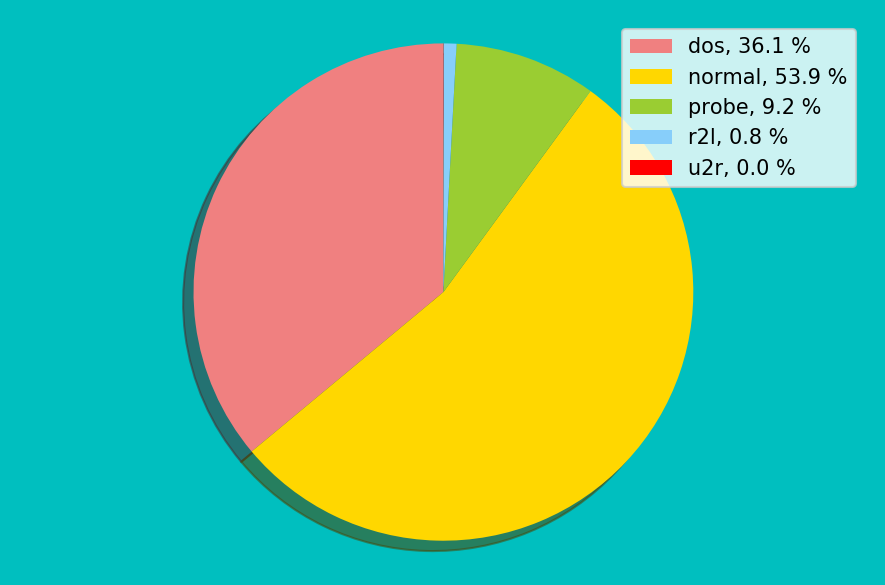

0 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [1805 2697  459   41    1]


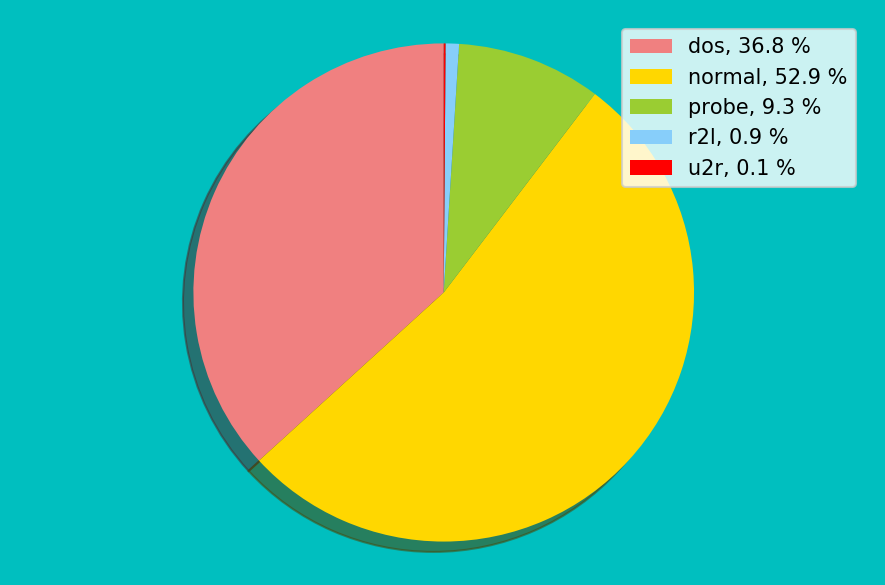

1 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [1840 2645  467   43    6]


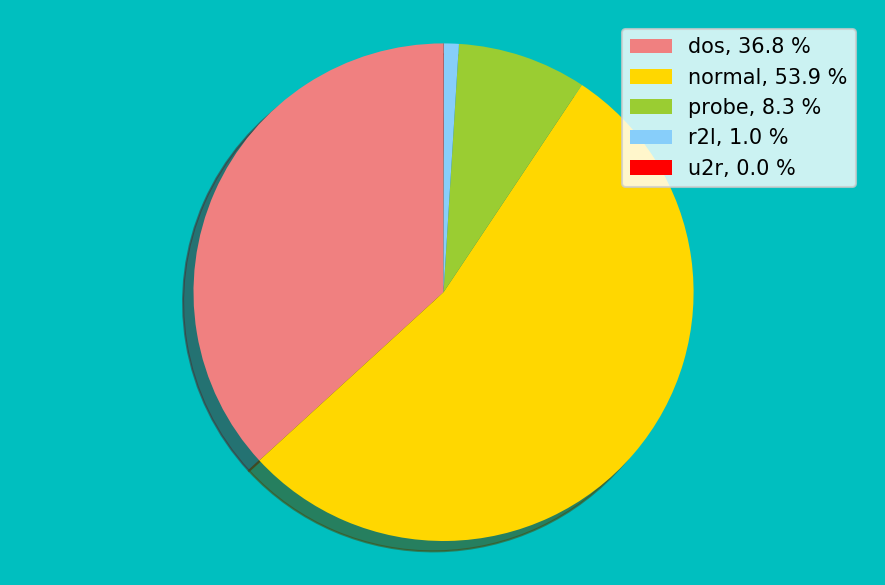

2 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [1840 2691  417   48    1]


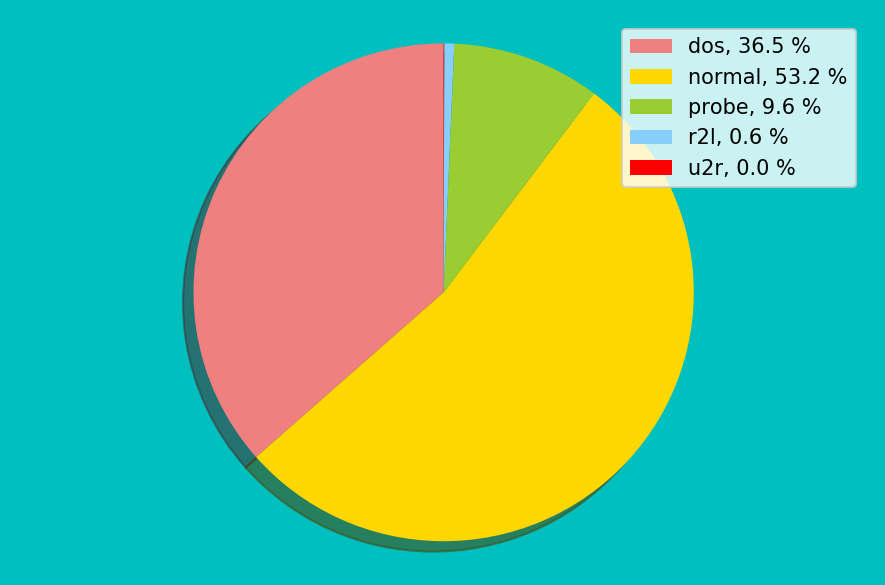

3 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [1825 2660  479   32    2]


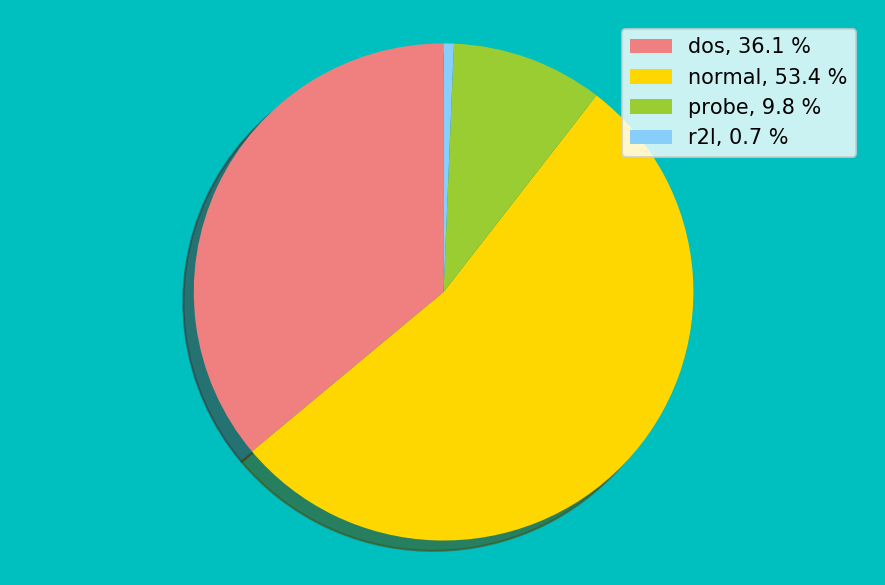

4 ['dos' 'normal' 'probe' 'r2l'] [1804 2671  491   33]


0.5346027682214577

In [12]:
max_sum = 0
for i in range(K):
    clValue,counts = np.unique(dataSet[Class][clusters == i],return_counts=True)  
    pieplotter(clValue, counts)
    print(i,clValue,counts)
    max_sum += max(counts)
purity = max_sum/dataSet.shape[0]
    
purity

### Reading the data set

In [13]:
dataSet = pd.read_csv("./../output_data/q-1-1_b_ReLU.csv")
Class = "xAttack"
columns = list(dataSet.columns)
X = dataSet[columns[:-1]].values
# X
Y = dataSet[Class]

### setting parameters

In [14]:
K = 5

In [15]:
centers_new, clusters = K_means(K,X)

Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
Iteration:  22
Iteration:  23
Iteration:  24
Iteration:  25
Iteration:  26
Iteration:  27
Iteration:  28
Iteration:  29
Iteration:  30
Iteration:  31
Iteration:  32
Iteration:  33
Iteration:  34
Iteration:  35
Iteration:  36
Iteration:  37
Iteration:  38
Iteration:  39
Iteration:  40
Iteration:  41
Iteration:  42
Iteration:  43
Iteration:  44
Iteration:  45
Iteration:  46
Iteration:  47
Iteration:  48
Iteration:  49
Iteration:  50
Iteration:  51
Iteration:  52
Iteration:  53
Iteration:  54
Iteration:  55
Iteration:  56
Iteration:  57
Iteration:  58


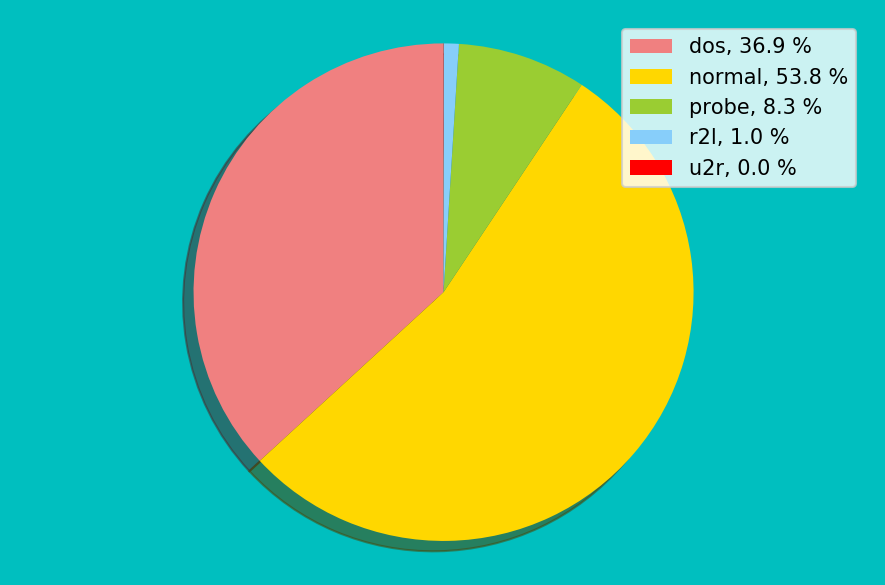

0 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [1844 2693  417   48    1]


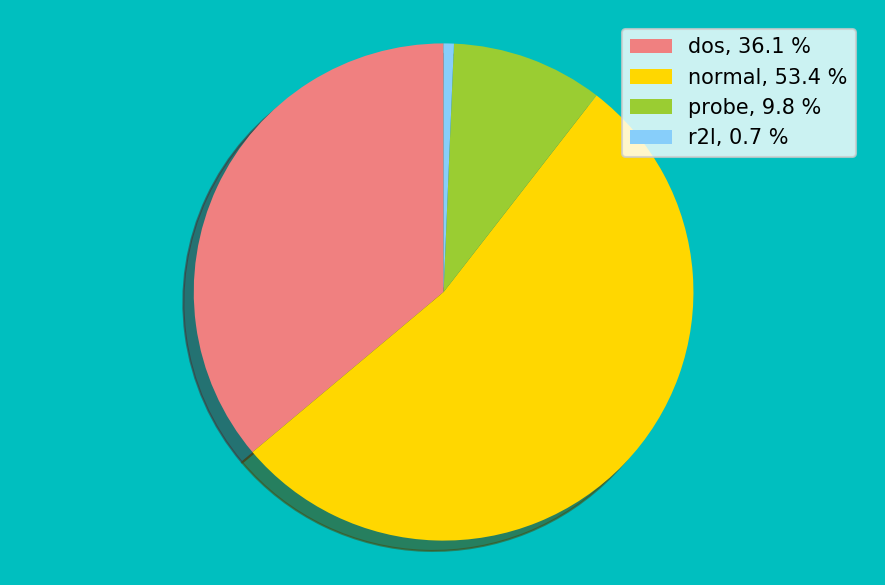

1 ['dos' 'normal' 'probe' 'r2l'] [1807 2669  491   33]


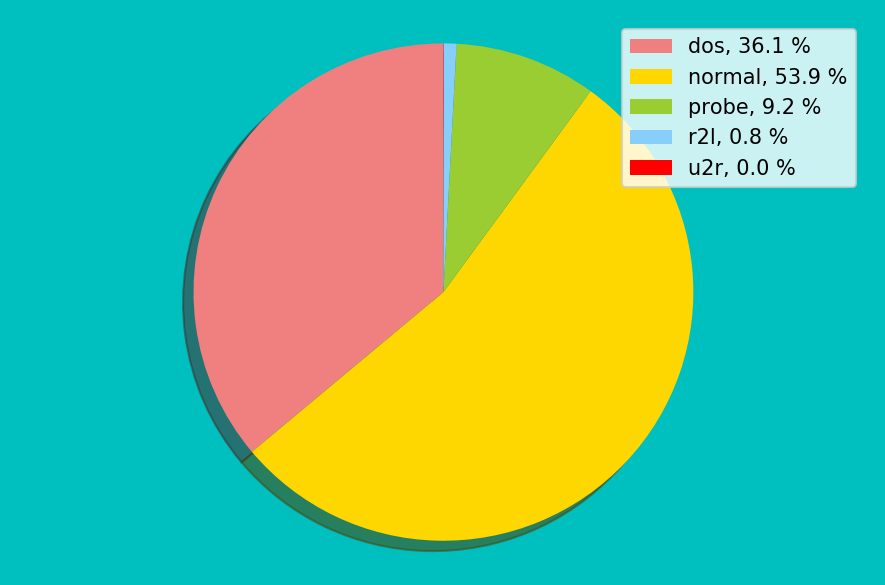

2 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [1804 2691  459   41    1]


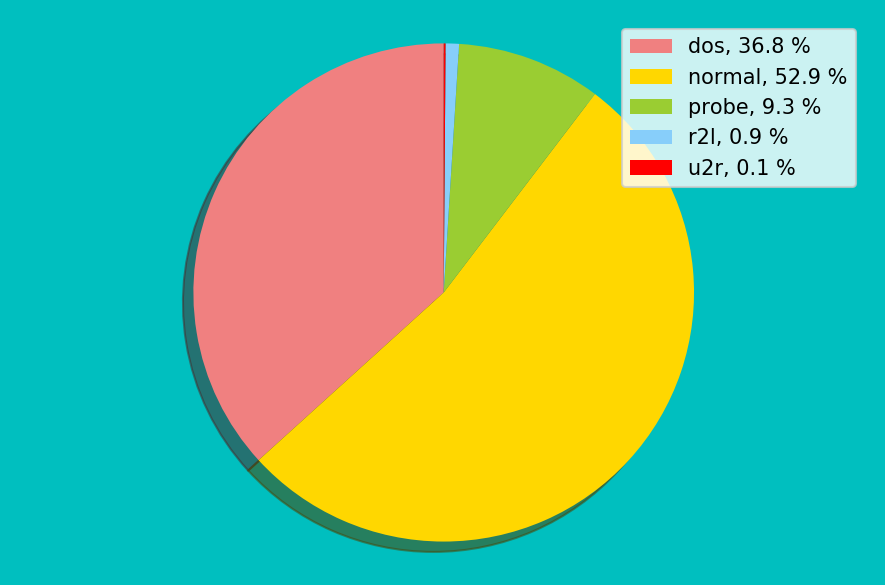

3 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [1837 2645  467   43    6]


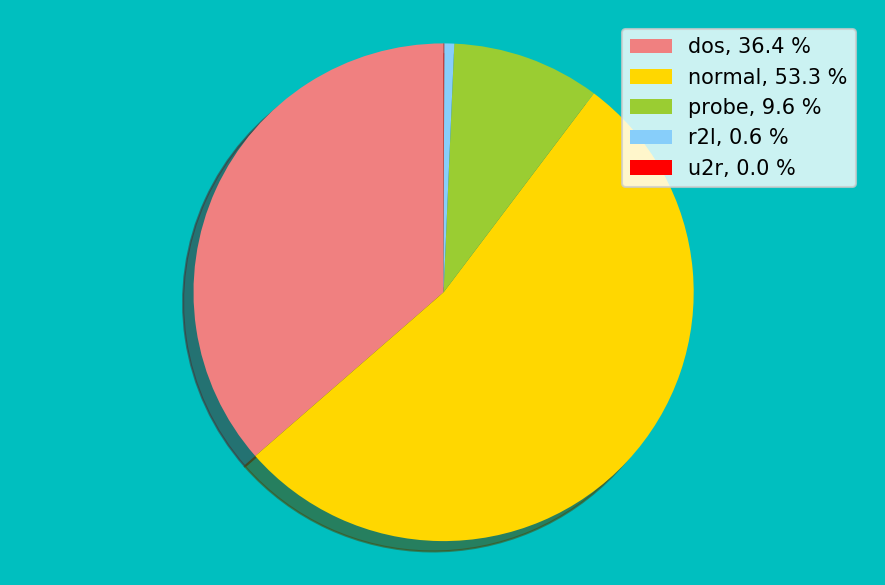

4 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [1822 2666  479   32    2]


0.5346027682214577

In [16]:
max_sum = 0
for i in range(K):
    clValue,counts = np.unique(dataSet[Class][clusters == i],return_counts=True)  
    pieplotter(clValue, counts)
    print(i,clValue,counts)
    max_sum += max(counts)
purity = max_sum/dataSet.shape[0]
    
purity

### Reading the data set

In [17]:
dataSet = pd.read_csv("./../output_data/q-1-1_b_tanh.csv")
Class = "xAttack"
columns = list(dataSet.columns)
X = dataSet[columns[:-1]].values
# X
Y = dataSet[Class]

### setting parameters

In [18]:
K = 5

In [19]:
centers_new, clusters = K_means(K,X)

Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
Iteration:  22
Iteration:  23
Iteration:  24
Iteration:  25
Iteration:  26
Iteration:  27
Iteration:  28
Iteration:  29
Iteration:  30
Iteration:  31
Iteration:  32
Iteration:  33
Iteration:  34
Iteration:  35
Iteration:  36
Iteration:  37
Iteration:  38
Iteration:  39
Iteration:  40
Iteration:  41
Iteration:  42
Iteration:  43
Iteration:  44
Iteration:  45
Iteration:  46
Iteration:  47
Iteration:  48
Iteration:  49
Iteration:  50
Iteration:  51
Iteration:  52
Iteration:  53
Iteration:  54
Iteration:  55
Iteration:  56
Iteration:  57
Iteration:  58
Iteration:  59
Iteration:  60
Iteration:  61
Iteration:  62
Iteration:  63
Iteration:  64
Iteration:  65


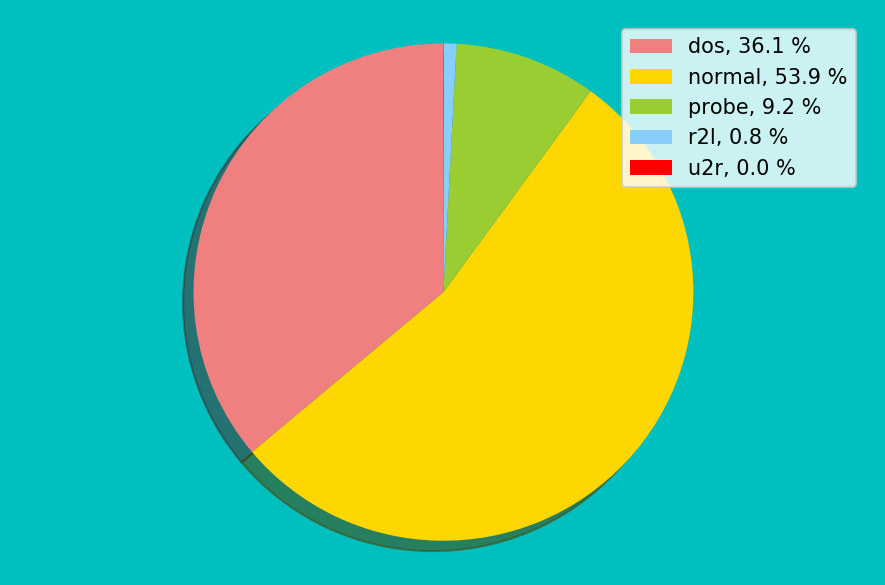

0 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [1805 2691  459   41    1]


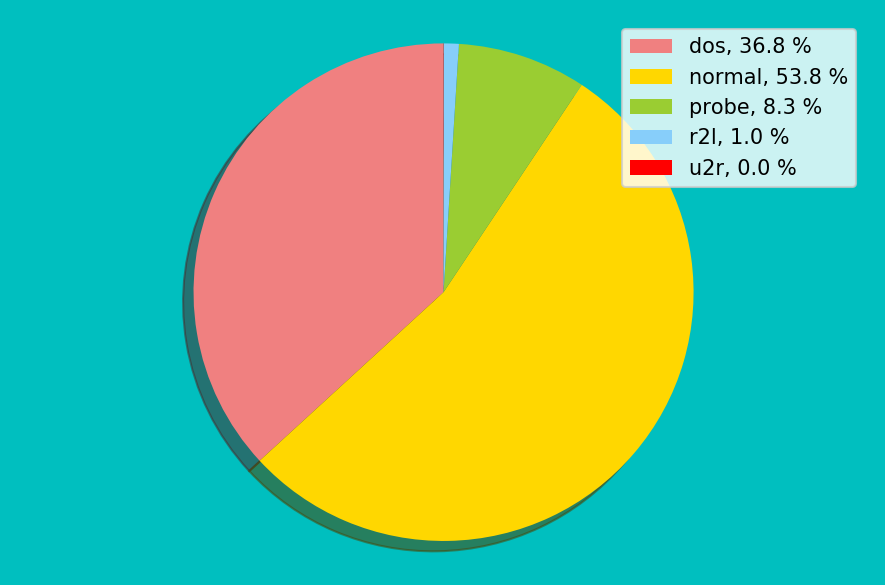

1 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [1843 2693  417   48    1]


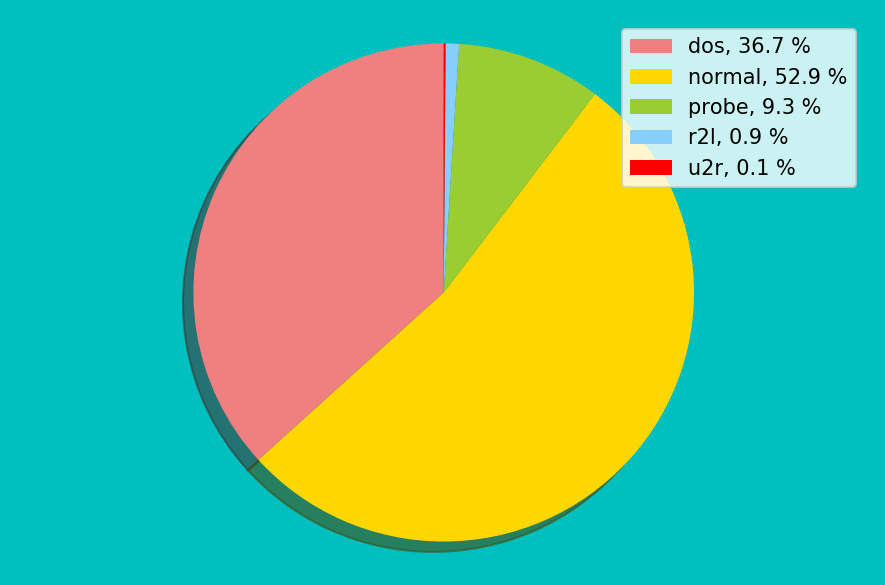

2 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [1836 2646  467   43    6]


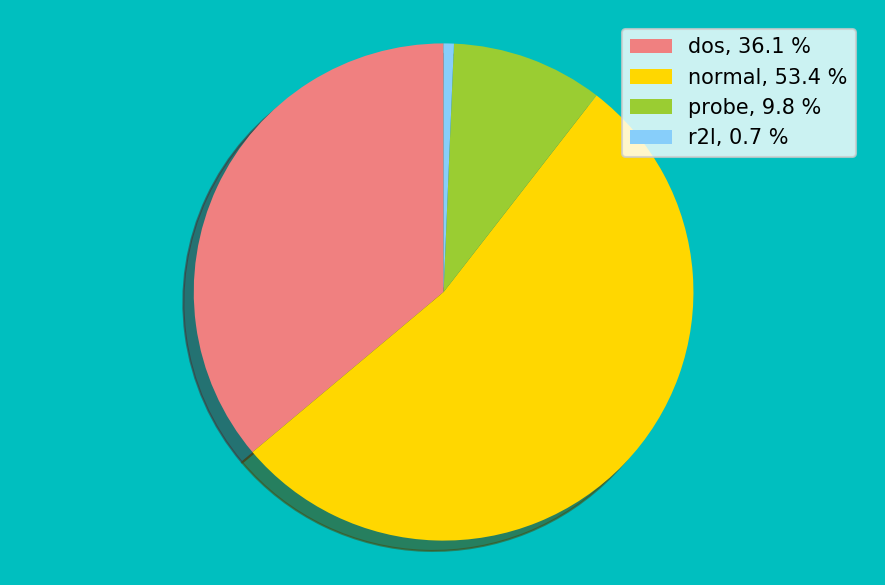

3 ['dos' 'normal' 'probe' 'r2l'] [1807 2669  491   33]


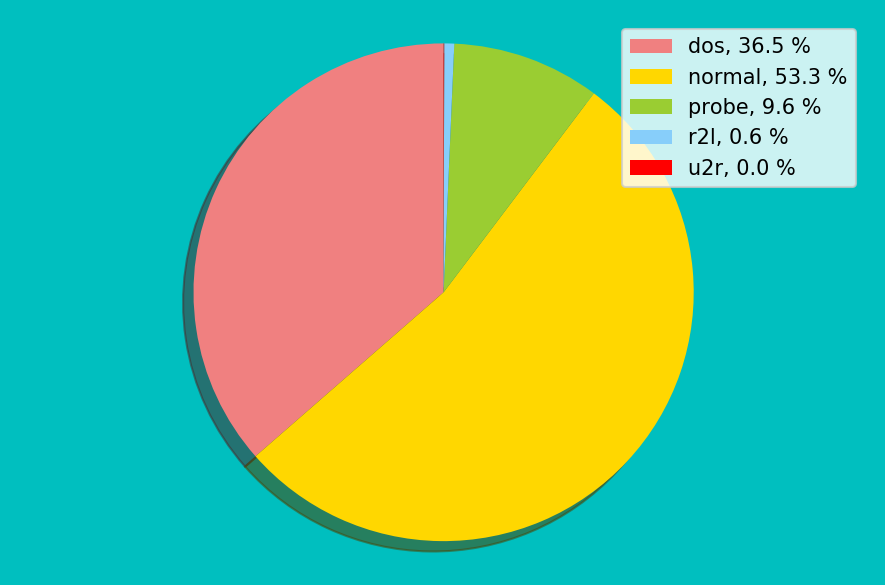

4 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [1823 2665  479   32    2]


0.5346027682214577

In [20]:
max_sum = 0
for i in range(K):
    clValue,counts = np.unique(dataSet[Class][clusters == i],return_counts=True)  
    pieplotter(clValue, counts)
    print(i,clValue,counts)
    max_sum += max(counts)
purity = max_sum/dataSet.shape[0]
    
purity